# UCSD COGS 108 - Final Project

## Student Performance

## Background / Introduction

As college students it is safe to assume we have taken a plethora amount of exams to test our knowledge. It is often asked how does one do well in these exams? As adults, we know the ultimate equalizer to this question is great effort, and discipline to study hard, and most importantly smart. 

However, prior to being adults, we like to define success based on predetermined aspects of our lives that we ultimately can not change. This brings steriotypes into the equation: "Ethnicity 'X' are good at 'X'", "Girls are better at 'X' than boys", "Your parent's education level dictates yours", etc etc. 

While assumptions hold no basis in overall success in life, is there a possibility that the hand that we are dealt hold some ___ in how our test scores will turn out? This is the question that sparks our curiosity to analyze this dataset. To answer this question, we will be using predictive analysis to find out how accurate we can predict Math, Reading, and Writing scores based on a linear combination of the feature space. In addition, we will try and find which features have the greatest influence on these scores. 

Lastly, we will see if we can accurately predict gender based on the different features, as well as can we accurately predict whether the student has completed a test prep course. In doing so, we can assume whether gender plays a role in scores, and whether a test prep course is necessary to score well. This assumption comes through because if we can accurately predict gender / test prep usage, then there are features in the data that can be used to predict them.

## Data Description

The dataset we are using comes from Kaggle called "Students Performance in Exams". The dataset contains one CSV file "StudentsPerformance.csv" which contains randomly generated Marks of high school students from the United States. Although the data is fictional, there is some warrant to it. 

The use of fictional data is also a two edged sword. Since the dataset has been made public, there are no identifiers we would need to clean and as a result violate any privacy issues. On the flip-side, it could be argued since the data is fictional, it would be hard to translate it into the real world. However, anecdotally speaking, one group member who worked at a high school states that the data resembles real world data.

This dataset includes features such as gender, race, parent's highest level of education, whether the student gets free or reduced lunch, preparation course completion, as well as math, reading, and writing scores.

Link for Data Set: https://www.kaggle.com/spscientist/students-performance-in-exams

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [2]:
df_students = pd.read_csv('StudentsPerformance.csv')
df_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df_students = df_students.rename(index=str, columns={"race/ethnicity": "race", "parental level of education": "parent_edu", 
                                       'test preparation course': 'test_prep', 'math score': 'math_score', 'reading score':'reading_score'
                                                    ,'writing score': 'writing_score'})

In [4]:
df_students.head()

,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df_students.isnull().sum()

gender           0
race             0
parent_edu       0
lunch            0
test_prep        0
math_score       0
reading_score    0
writing_score    0
dtype: int64

## Data Cleaning

In [6]:
#One hot encoding variables below
one_hot = df_students[['race', 'parent_edu', 'lunch']]
to_keep = df_students[['gender', 'test_prep', 'math_score', 'reading_score', 'writing_score']]
df = pd.concat([pd.get_dummies(one_hot), to_keep], axis=1)

#Changing genders to 1 for male / 0 for female
df['gender'] = df['gender'].replace(['male', 'female'], [1,0])

#Changing test prep course to 1 for completed / 0 for none
df['test_prep'] = df['test_prep'].replace(['completed', 'none'], [1,0])

df.head()

,race_group A,race_group B,race_group C,race_group D,race_group E,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school,lunch_free/reduced,lunch_standard,gender,test_prep,math_score,reading_score,writing_score
0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,72,72,74
1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,69,90,88
2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,90,95,93
3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,47,57,44
4,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,76,78,75


## Exploring and Visualizing the Data Set

### Testing for Correlation between all the variables

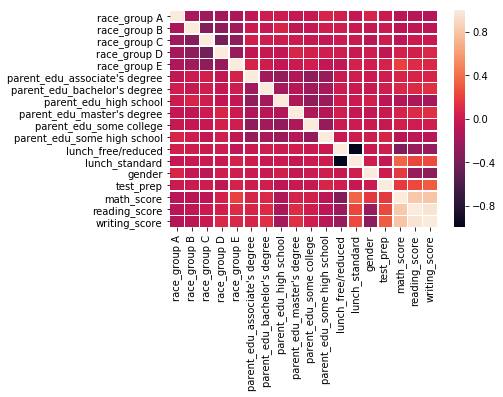

In [7]:
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, linewidth=0.5)
plt.show()

### Gender Counts

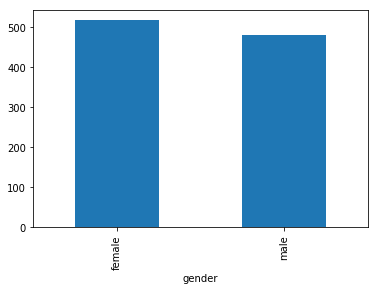

In [8]:
df_students.groupby('gender').size().plot(kind='bar')

### Race / Ethnicity Counts

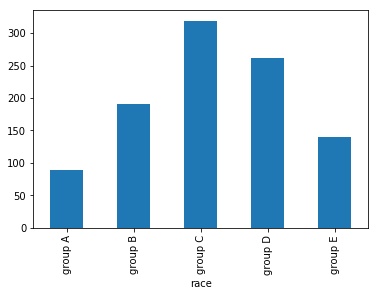

In [9]:
df_students.groupby('race').size().plot(kind='bar')

### Parental Highest Education Level Counts

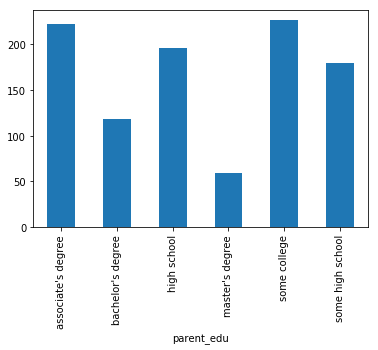

In [10]:
df_students.groupby('parent_edu').size().plot(kind='bar')

### Free / Reduced or Standard Lunch Counts

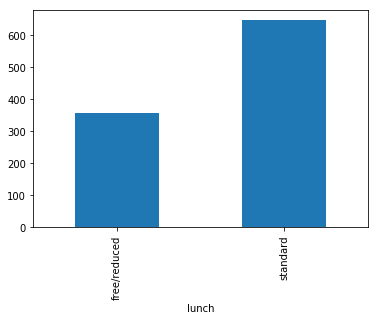

In [11]:
df_students.groupby('lunch').size().plot(kind='bar')

### Test Prep Counts

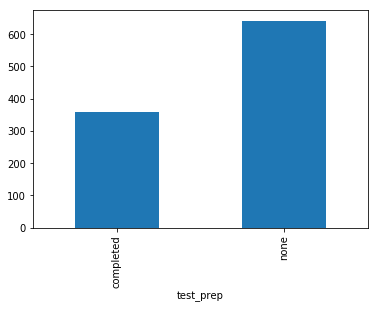

In [12]:
df_students.groupby('test_prep').size().plot(kind='bar')

### Score Distribution

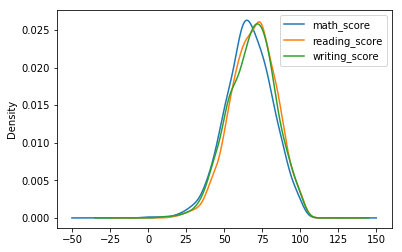

In [13]:
df_students[['math_score', 'reading_score', 'writing_score']].plot.kde()

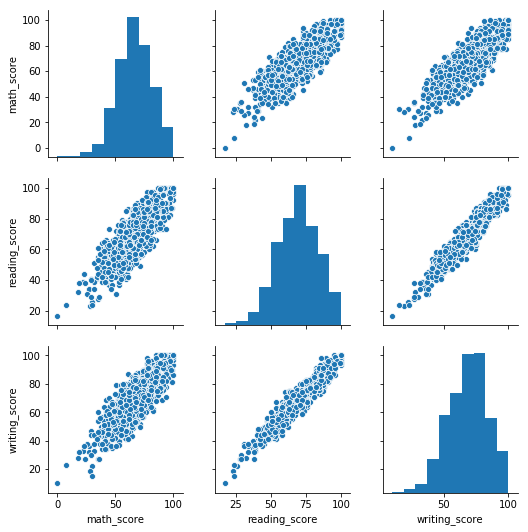

In [14]:
sns.pairplot(df_students)

Text(0.5, 0, 'Reading Scores')

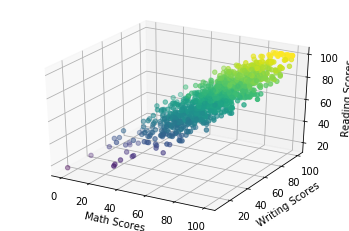

In [15]:
ax = plt.axes(projection='3d')

ax.scatter3D(df_students['math_score'], df_students['writing_score'], df_students['reading_score'], c=df_students['reading_score'])
ax.set_xlabel('Math Scores')
ax.set_ylabel('Writing Scores')
ax.set_zlabel('Reading Scores')

## Data Analysis

This is where we start to use the data to predict test scores using the categorical data. There will be an 80/20 test/train split and we will be reporting the test accuracy and train accuracy set in order to see whether we are over-fitting the data. As long as there is no more than a +/-5% variance between the test and train accuracies, it's safe to assume we have not over-fitted or under-fitted the data.

## Linear Regression

For a regular linear regression analysis, we will be printing out the p-values of each feature and will be opting to use all the coefficients whether or not it has a high p-value. This is because we will be using Least Angle Regression later to provide the optimal features to create our regression line.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Math Score Prediction

In [17]:
X_math = df[['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E', "parent_edu_associate's degree",
      "parent_edu_bachelor's degree", "parent_edu_high school", "parent_edu_master's degree", "parent_edu_some college",
     "parent_edu_some high school", 'lunch_free/reduced', 'lunch_standard', 'gender', 'test_prep', 'reading_score', 
      'writing_score']]
y_math = df['math_score']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_math, y_math, test_size=0.2, random_state=101)

In [18]:
#Using OLS from the homeworks to see p-values of each coefficient, however all the features will still be used

est_m = sm.OLS(y_math, X_math)
result_m = est_m.fit()
print(result_m.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     500.3
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        08:54:40   Log-Likelihood:                -3090.7
No. Observations:                1000   AIC:                             6211.
Df Residuals:                     985   BIC:                             6285.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
race_group A  

#### Accuracy

In [19]:
#Creating the linear regression classifier and printing out the accuracy of both test and train data set

lm_m = LinearRegression()
lm_m.fit(X_train_m,y_train_m)
predictions_m = lm_m.predict(X_test_m)

accuracy_m = lm_m.score(X_test_m,y_test_m)
print("Test Accuracy: {:.2f}%" .format(accuracy_m*100))

acc_m_tr = lm_m.score(X_train_m, y_train_m)
print("Train Accuracy: {:.2f}%" .format(acc_m_tr*100))

Test Accuracy: 85.39%
Train Accuracy: 88.06%


#### Comparing the test and train accuracies, it shows that we are not over-fitting the data even while using all the features. This is off to a great start!

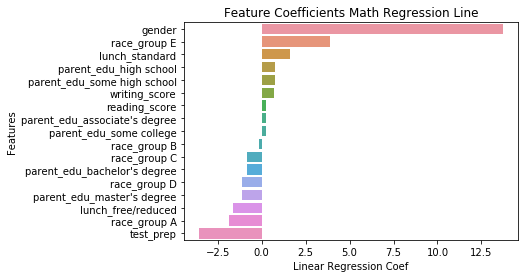

In [20]:
#Creating horizontal bar plot to visualize the features and their respective coefficient size in comparison to other
#features

feature_reg_m = pd.Series(lm_m.coef_,index = X_test_m.columns).sort_values(ascending=False)
sns.barplot(x=feature_reg_m, y=feature_reg_m.index)
plt.xlabel('Linear Regression Coef')
plt.ylabel('Features')
plt.title("Feature Coefficients Math Regression Line")
plt.show()

#### Looking at the coefficients that go into the equation, it shows gender to have a great impact on math scores. Since Gender can either accept 0 or 1, this shows that being a girl means you will score 12 points higher than boys! In addition, if you took the prep test course, you would lose points on the math portion. Definitely not something you want to see if you were teaching the prep course.

### Reading Score Prediction

In [21]:
X_read = df[['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E', "parent_edu_associate's degree",
      "parent_edu_bachelor's degree", "parent_edu_high school", "parent_edu_master's degree", "parent_edu_some college",
     "parent_edu_some high school", 'lunch_free/reduced', 'lunch_standard', 'gender', 'test_prep', 'math_score', 
      'writing_score']]
y_read = df['reading_score']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_read, y_read, test_size=0.2, random_state=101)

In [22]:
est_r = sm.OLS(y_read, X_read)
result_r = est_r.fit()
print(result_r.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     887.9
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        08:54:40   Log-Likelihood:                -2793.7
No. Observations:                1000   AIC:                             5617.
Df Residuals:                     985   BIC:                             5691.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
race_group A  

#### Accuracy

In [23]:
lm_r = LinearRegression()
lm_r.fit(X_train_r,y_train_r)
predictions_r = lm_r.predict(X_test_r)

accuracy_r = lm_r.score(X_test_r,y_test_r)
print("Test Accuracy: {:.2f}%" .format(accuracy_r*100))

acc_r_tr = lm_r.score(X_train_r, y_train_r)
print("Train Accuracy: {:.2f}%" .format(acc_r_tr*100))

Test Accuracy: 91.17%
Train Accuracy: 92.99%


#### Even with using the features with high p-value > 0.05, we are still getting great accuracy percentages

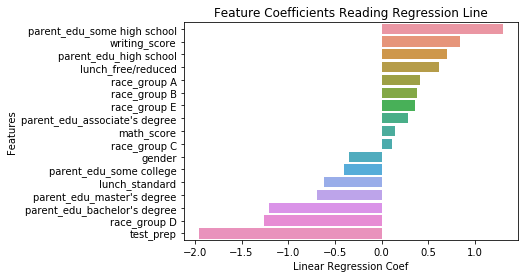

In [24]:
feature_reg_r = pd.Series(lm_r.coef_,index = X_test_r.columns).sort_values(ascending=False)
sns.barplot(x=feature_reg_r, y=feature_reg_r.index)
plt.xlabel('Linear Regression Coef')
plt.ylabel('Features')
plt.title("Feature Coefficients Reading Regression Line")
plt.show()

#### This was very surprising to see, not in the sense of what features helped the scores increase, but more so what made the scores decrease. It was really surprising to see that the use of a test prep hurt scores once again. It seems again that whoever is teaching the prep course, or the material taught don't help the students at all, and is rather hurting them.

### Writing Score Prediction

In [25]:
X_write = df[['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E', "parent_edu_associate's degree",
      "parent_edu_bachelor's degree", "parent_edu_high school", "parent_edu_master's degree", "parent_edu_some college",
     "parent_edu_some high school", 'lunch_free/reduced', 'lunch_standard', 'gender', 'test_prep', 'math_score', 
      'reading_score']]
y_write = df['writing_score']

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_write, y_write, test_size=0.2, random_state=101)

In [26]:
est_w = sm.OLS(y_write, X_write)
result_w = est_w.fit()
print(result_w.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1281.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        08:54:41   Log-Likelihood:                -2661.8
No. Observations:                1000   AIC:                             5354.
Df Residuals:                     985   BIC:                             5427.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
race_group A  

#### Accuracy

In [27]:
lm_w = LinearRegression()
lm_w.fit(X_train_w,y_train_w)
predictions_w = lm_w.predict(X_test_w)

accuracy_w = lm_w.score(X_test_w,y_test_w)
print("Test Accuracy: {:.2f}%" .format(accuracy_w*100))

acc_w_tr = lm_w.score(X_train_w, y_train_w)
print("Train Accuracy: {:.2f}%" .format(acc_w_tr*100))

Test Accuracy: 93.95%
Train Accuracy: 94.97%


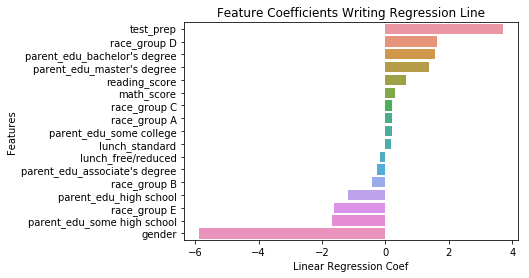

In [28]:
feature_reg_w = pd.Series(lm_w.coef_,index = X_test_w.columns).sort_values(ascending=False)
sns.barplot(x=feature_reg_w, y=feature_reg_w.index)
plt.xlabel('Linear Regression Coef')
plt.ylabel('Features')
plt.title("Feature Coefficients Writing Regression Line")
plt.show()

## Least Angle Regression

##### Start building Least Angle Regression model. Although given a high accuracy for each linear regression model, we would like to find the most parsimonious model for each given score e.g. it would not be logical to use all the variables given if we can gain the same accuracy with fewer variables

In [29]:
from sklearn import linear_model

### Math Score Predictions

In [30]:
reg_m = linear_model.LassoLars(alpha=0.01)
reg_m.fit(X_train_m, y_train_m)
reg_m_inter = reg_m.intercept_
reg_m_coef = reg_m.coef_

accuracy_m_lars = reg_m.score(X_test_m,y_test_m)
acc_m_lars_tr = reg_m.score(X_train_m, y_train_m)

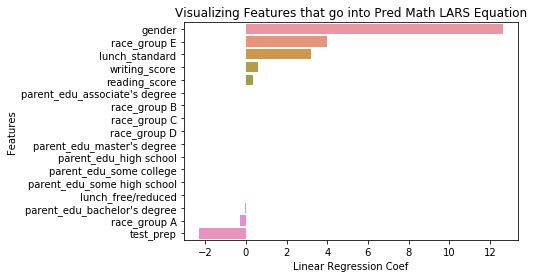

In [31]:
feature_imp_m = pd.Series(reg_m_coef,index = X_test_m.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_m, y=feature_imp_m.index)
plt.xlabel('Linear Regression Coef')
plt.ylabel('Features')
plt.title("Visualizing Features that go into Pred Math LARS Equation")
plt.show()

### Accuracy

In [32]:
print("Test Accuracy: {:.2f}%" .format(accuracy_m_lars*100))
print("Train Accuracy: {:.2f}%" .format(acc_m_lars_tr*100))

Test Accuracy: 85.61%
Train Accuracy: 87.65%


### Reading Score Predictions

In [33]:
reg_r = linear_model.LassoLars(alpha=.01)
reg_r.fit(X_train_r, y_train_r)
reg_r_inter = reg_r.intercept_
reg_r_coef = reg_r.coef_

accuracy_r_lars = reg_r.score(X_test_r,y_test_r)
acc_r_lars_tr = reg_r.score(X_train_r, y_train_r)

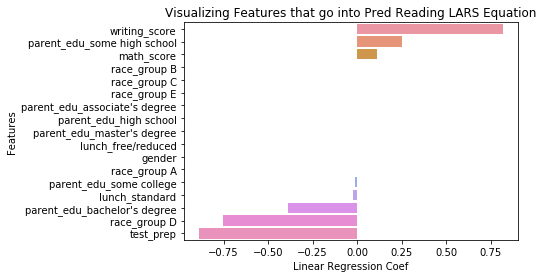

In [34]:
feature_imp_r = pd.Series(reg_r_coef,index = X_test_r.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_r, y=feature_imp_r.index)
plt.xlabel('Linear Regression Coef')
plt.ylabel('Features')
plt.title("Visualizing Features that go into Pred Reading LARS Equation")
plt.show()

#### Accuracy 

In [35]:
print("Test Accuracy: {:.2f}%" .format(accuracy_r_lars*100))
print("Train Accuracy: {:.2f}%" .format(acc_r_lars_tr*100))

Test Accuracy: 91.00%
Train Accuracy: 92.52%


### Writing Score Predictions

In [36]:
reg_w = linear_model.LassoLars(alpha=.01)
reg_w.fit(X_train_w, y_train_w)
reg_w_inter = reg_w.intercept_
reg_w_coef = reg_w.coef_

accuracy_w_lars = reg_w.score(X_test_w,y_test_w)
acc_w_lars_tr = reg_w.score(X_train_w, y_train_w)

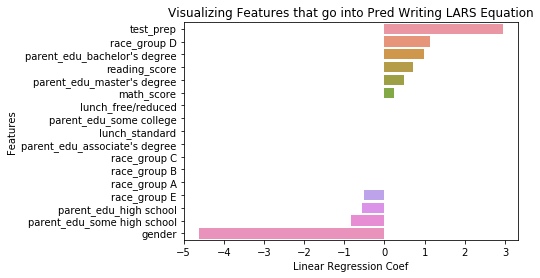

In [37]:
feature_imp_w = pd.Series(reg_w_coef,index = X_test_w.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_w, y=feature_imp_w.index)
plt.xlabel('Linear Regression Coef')
plt.ylabel('Features')
plt.title("Visualizing Features that go into Pred Writing LARS Equation")
plt.show()

#### Accuracy

In [38]:
print("Accuracy: {:.2f}%" .format(accuracy_w_lars*100))
print("Train Accuracy: {:.2f}%" .format(acc_w_lars_tr*100))

Accuracy: 93.77%
Train Accuracy: 94.60%


#### As we can see, we are essentially getting the same highest coefficient values used similar to the regular linear regression model using all the features. The use of LARs essentially helped cut out the most useless features to help optimize the model. We were getting the same level of accuracy in comparison to the linear regression using all the features without over-fitting the LARs model. Over-all, I would use the LARs model since it uses the least amount of features. The coefficients themselves were not interesting by themselves per say, but the fact that the features that made a large difference in our full linear regression model coincide with that of our LARs model.

## Classifier to Predict Gender and Test Prep Usage

##### The use of Random Forest was an easy one to make, for one, it can handle a lot of features without over-fitting. Not only this but it creates many trees and combines them together to prevent over-fitting of the data. Not only this, but Random Forest package gives us the most used features used in the model. (However, it should be noted that over-fitting especially with a model like random forest will be hard to avoid since re-testing on the test dataset would obviously yield a high accuracy)

### Predicting Gender

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
#Splitting the dataset once again for Gender and Test Prep predictions

X_gender = df[['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E', "parent_edu_associate's degree",
      "parent_edu_bachelor's degree", "parent_edu_high school", "parent_edu_master's degree", "parent_edu_some college",
     "parent_edu_some high school", 'lunch_free/reduced', 'lunch_standard', 'test_prep', 'math_score', 'reading_score', 
      'writing_score']]
y_gender = df['gender']

X_prep = df[['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E', "parent_edu_associate's degree",
      "parent_edu_bachelor's degree", "parent_edu_high school", "parent_edu_master's degree", "parent_edu_some college",
     "parent_edu_some high school", 'lunch_free/reduced', 'lunch_standard', 'gender', 'math_score', 'reading_score', 
      'writing_score']]
y_prep = df['test_prep']

In [41]:
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gender, y_gender, test_size=0.2, random_state=101)

In [42]:
#Using a grid search with cross validation to find the best n-features model

RF_gen = RandomForestClassifier(n_estimators = 100)
RFn_feat = [1, 4, 8, 12, 16]
RFparameters = {'max_features': RFn_feat}
RF_gen_cv = GridSearchCV(RF_gen, RFparameters, iid = 'true', cv = 3, return_train_score= 'true')
RF_gen_cv.fit(X_train_gen, y_train_gen)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='true', n_jobs=None,
       param_grid={'max_features': [1, 4, 8, 12, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='true',
       scoring=None, verbose=0)

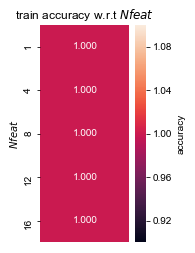

In [43]:
#Using a heat map to plot the different N-Features's train set accuracy

RF_gen_train = RF_gen_cv.cv_results_['mean_train_score']

plt.figure(figsize = (2,4))
hm_gen = sns.heatmap(RF_gen_train.reshape(-1,1), annot=True, fmt='.3f', yticklabels=RFn_feat, xticklabels=[])
hm_gen.collections[0].colorbar.set_label("accuracy")
hm_gen.set(ylabel='$N feat$')
plt.title('train accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

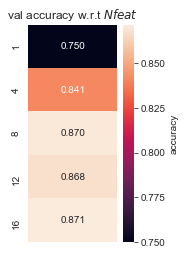

In [44]:
#Creating a heat map of the validation set of N-Features in order to use the best N-Features in our test set

RF_gen_val = RF_gen_cv.cv_results_['mean_test_score']

plt.figure(figsize = (2,4))
hm_gen1 = sns.heatmap(RF_gen_val.reshape(-1,1), annot=True, fmt='.3f', yticklabels=RFn_feat, xticklabels=[])
hm_gen1.collections[0].colorbar.set_label("accuracy")
ax.set(ylabel='$N feat$')
plt.title('val accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [45]:
print('Best max-feature from Validation Accuracy is: {:f}'.format(RF_gen_cv.best_params_['max_features']))

Best max-feature from Validation Accuracy is: 16.000000


In [46]:
#Training classifier using the best N-Features found above

RF_gen_ = RandomForestClassifier(n_estimators=100, max_features = RF_gen_cv.best_params_['max_features'])
RF_gen_.fit(X_train_gen,y_train_gen)

accuracy_gen_clf = RF_gen_.score(X_test_gen,y_test_gen)
acc_gen_train = RF_gen_.score(X_train_gen, y_train_gen)

In [47]:
print("Test Accuracy: {:.2f}%" .format(accuracy_gen_clf*100))
print("Train Accuracy: {:.2f}%" .format(acc_gen_train*100))

Test Accuracy: 84.00%
Train Accuracy: 100.00%


In [48]:
feature_imp_gen = pd.Series(RF_gen_.feature_importances_,index = X_test_gen.columns).sort_values(ascending=False)

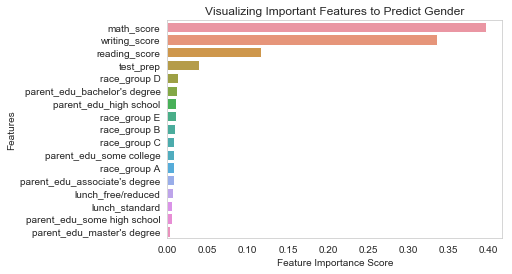

In [49]:
#Creating a horizontal bar plot to visualize the best features used in predicting gender

sns.barplot(x=feature_imp_gen, y=feature_imp_gen.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features to Predict Gender")
plt.show()

#### This was very interesting to see what features were the most important when it came to predicting Gender. It isn't surprising to see what math scores were the most used predictor since gender was the highest coefficient used when predicting math scores. It was also interesting to see how high the accuracy of prediction rate for Gender was. 

### Predicting Whether the Student Took a Test Prep Course

In [50]:
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(X_prep, y_prep, test_size=0.2, random_state=101)

In [51]:
RF_prep = RandomForestClassifier(n_estimators = 100)
RFn_feat = [1, 4, 8, 12, 16]
RFparameters = {'max_features': RFn_feat}
RF_prep_cv = GridSearchCV(RF_prep, RFparameters, iid = 'true', cv = 3, return_train_score= 'true')
RF_prep_cv.fit(X_train_prep, y_train_prep)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='true', n_jobs=None,
       param_grid={'max_features': [1, 4, 8, 12, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='true',
       scoring=None, verbose=0)

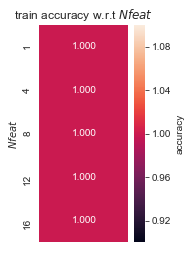

In [52]:
RF_prep_train = RF_prep_cv.cv_results_['mean_train_score']

plt.figure(figsize = (2,4))
hm_prep = sns.heatmap(RF_prep_train.reshape(-1,1), annot=True, fmt='.3f', yticklabels=RFn_feat, xticklabels=[])
hm_prep.collections[0].colorbar.set_label("accuracy")
hm_prep.set(ylabel='$N feat$')
plt.title('train accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

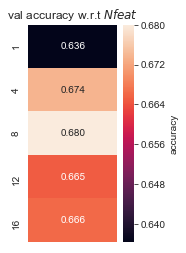

In [53]:
RF_prep_val = RF_prep_cv.cv_results_['mean_test_score']

plt.figure(figsize = (2,4))
hm_prep1 = sns.heatmap(RF_prep_val.reshape(-1,1), annot=True, fmt='.3f', yticklabels=RFn_feat, xticklabels=[])
hm_prep1.collections[0].colorbar.set_label("accuracy")
ax.set(ylabel='$N feat$')
plt.title('val accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [54]:
print('Best max-feature from Validation Accuracy is: {:f}'.format(RF_prep_cv.best_params_['max_features']))

Best max-feature from Validation Accuracy is: 8.000000


In [55]:
RF_prep_ = RandomForestClassifier(n_estimators=100, max_features = RF_prep_cv.best_params_['max_features'])
RF_prep_.fit(X_train_prep,y_train_prep)

accuracy_prep_clf = RF_prep_.score(X_test_prep,y_test_prep)
acc_prep_train = RF_prep_.score(X_train_prep, y_train_prep)

In [56]:
print("Test Accuracy: {:.2f}%" .format(accuracy_prep_clf*100))
print("Train Accuracy: {:.2f}%" .format(acc_prep_train*100))

Test Accuracy: 67.50%
Train Accuracy: 100.00%


In [57]:
feature_imp_prep = pd.Series(RF_prep_.feature_importances_,index = X_test_prep.columns).sort_values(ascending=False)

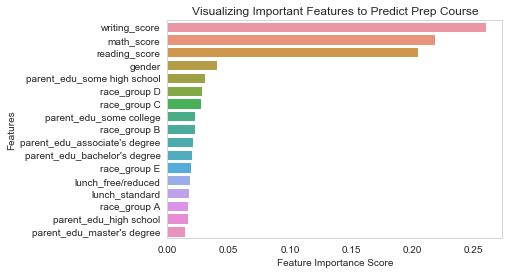

In [58]:
sns.barplot(x=feature_imp_prep, y=feature_imp_prep.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features to Predict Prep Course")
plt.show()

#### It is not surprising that test prep course predictions were not as accurate as predicting Gender. What made it interesting was the fact that the most important predictors were also negatively correlated with Test Prep Course usage. Due to the low accuracy in prediction, it could possibly mean that test prep courses in this case are not effective. This could be further argued by the fact that in the regression models, they actually hurt scores if they were completed.

### KNN

#### Since we have found important features used in random forest (a type of bootstrapping technique), we wonder what the accuracy would be if we used a simple classifier like k-Nearest-Neighbors to predict gender and test prep usage just by using continuous variables such as scores. Since there will be a lot more variability in the data, we posit that accuracy could potentially be higher since there would not be a lot of variables for the model to sift though.

In [59]:
#Splitting the dataset once again for Gender and Test Prep predictions

X_gender_knn = df[['math_score', 'reading_score', 'writing_score']]
y_gender_knn = df['gender']

X_prep_knn = df[['math_score', 'reading_score', 'writing_score']]
y_prep_knn = df['test_prep']

### Predicting Gender using kNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier 

In [61]:
X_train_gen_knn, X_test_gen_knn, y_train_gen_knn, y_test_gen_knn = train_test_split(X_gender_knn, y_gender_knn, test_size=0.2, random_state=101)

In [62]:
kNN_clf_gen = KNeighborsClassifier()
kNNK_list = [5,10,15,20,25]
kNNparameters = {'n_neighbors': kNNK_list}
kNNclf_gen = GridSearchCV(kNN_clf_gen, kNNparameters, iid = 'true', cv = 3, return_train_score = 'true')
kNNclf_gen.fit(X_train_gen_knn, y_train_gen_knn)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='true', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='true',
       scoring=None, verbose=0)

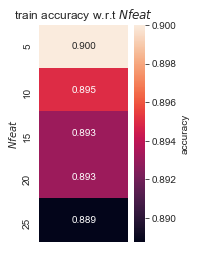

In [63]:
kNN_gen_train = kNNclf_gen.cv_results_['mean_train_score']

plt.figure(figsize = (2,4))
hm_prep = sns.heatmap(kNN_gen_train.reshape(-1,1), annot=True, fmt='.3f', yticklabels=kNNK_list, xticklabels=[])
hm_prep.collections[0].colorbar.set_label("accuracy")
hm_prep.set(ylabel='$N feat$')
plt.title('train accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

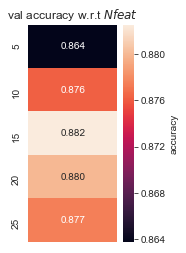

In [64]:
kNN_gen_val = kNNclf_gen.cv_results_['mean_test_score']

plt.figure(figsize = (2,4))
hm_prep1 = sns.heatmap(kNN_gen_val.reshape(-1,1), annot=True, fmt='.3f', yticklabels=kNNK_list, xticklabels=[])
hm_prep1.collections[0].colorbar.set_label("accuracy")
ax.set(ylabel='$N feat$')
plt.title('val accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [65]:
print('Best max-feature from Validation Accuracy is: {:f}'.format(kNNclf_gen.best_params_['n_neighbors']))

Best max-feature from Validation Accuracy is: 15.000000


In [66]:
kNN_gen = KNeighborsClassifier(n_neighbors = kNNclf_gen.best_params_['n_neighbors'])
kNN_gen.fit(X_train_gen_knn, y_train_gen_knn)

acc_gen_kNN_test = kNN_gen.score(X_test_gen_knn, y_test_gen_knn)
acc_gen_kNN_train = kNN_gen.score(X_train_gen_knn, y_train_gen_knn)

In [67]:
print("Test Accuracy: {:.2f}%" .format(acc_gen_kNN_test*100))
print("Train Accuracy: {:.2f}%" .format(acc_gen_kNN_train*100))

Test Accuracy: 82.50%
Train Accuracy: 89.62%


#### The accuracy actually dropped from 87% to 82.5%, could it be due to the fact that we are not using all the features? However, using just scores created create accuracy and is much more simple! This could also possibly mean that there is a way to tell between genders just on scores alone. This is not due to chance alone since we have almost equal number of boys and girls.

### Predicting Test Prep using kNN

In [68]:
X_train_prep_knn, X_test_prep_knn, y_train_prep_knn, y_test_prep_knn = train_test_split(X_prep_knn, y_prep_knn, test_size=0.2, random_state=101)

In [69]:
kNN_clf_prep = KNeighborsClassifier()
kNNK_list = [5,10,15,20,25]
kNNparameters = {'n_neighbors': kNNK_list}
kNNclf_prep = GridSearchCV(kNN_clf_prep, kNNparameters, iid = 'true', cv = 3, return_train_score = 'true')
kNNclf_prep.fit(X_train_prep_knn, y_train_prep_knn)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='true', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='true',
       scoring=None, verbose=0)

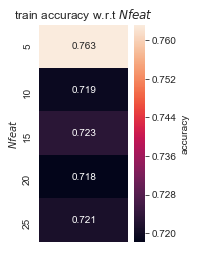

In [70]:
kNN_prep_train = kNNclf_prep.cv_results_['mean_train_score']

plt.figure(figsize = (2,4))
hm_prep = sns.heatmap(kNN_prep_train.reshape(-1,1), annot=True, fmt='.3f', yticklabels=kNNK_list, xticklabels=[])
hm_prep.collections[0].colorbar.set_label("accuracy")
hm_prep.set(ylabel='$N feat$')
plt.title('train accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

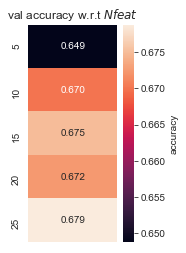

In [71]:
kNN_prep_val = kNNclf_prep.cv_results_['mean_test_score']

plt.figure(figsize = (2,4))
hm_prep1 = sns.heatmap(kNN_prep_val.reshape(-1,1), annot=True, fmt='.3f', yticklabels=kNNK_list, xticklabels=[])
hm_prep1.collections[0].colorbar.set_label("accuracy")
ax.set(ylabel='$N feat$')
plt.title('val accuracy' + ' w.r.t $N feat$')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [72]:
print('Best max-feature from Validation Accuracy is: {:f}'.format(kNNclf_prep.best_params_['n_neighbors']))

Best max-feature from Validation Accuracy is: 25.000000


In [73]:
kNN_prep = KNeighborsClassifier(n_neighbors = kNNclf_prep.best_params_['n_neighbors'])
kNN_prep.fit(X_train_prep_knn, y_train_prep_knn)

acc_prep_kNN_test = kNN_prep.score(X_test_prep_knn, y_test_prep_knn)
acc_prep_kNN_train = kNN_prep.score(X_train_prep_knn, y_train_prep_knn)

In [74]:
print("Test Accuracy: {:.2f}%" .format(acc_prep_kNN_test*100))
print("Train Accuracy: {:.2f}%" .format(acc_prep_kNN_train*100))

Test Accuracy: 65.00%
Train Accuracy: 73.00%


#### Wow! So in this case as well, the accuracies dropped from 72% using random forest, to 65% using k-Nearest-Neighbors. 

## Conclusions and Discussion

From our analysis, it generally shows that you can predict scores to a great accuracy using a different linear combination of categories and sometimes even other scores. 

The features that are noteworthy and accurately predict math the greatest are gender, if you are part of race/ethnicity Group E, and if you took a test prep course. For predicting reading scores, the best features to use were writing scores, and if you took prep courses. Writing score's most involved features included, if you took a prep course, and your Gender. 

These are not the only features that were used in the Occam's Razor version of the linear regression model, but were the highest coefficient values that both impact the scores positively and negatively. What is also interesting about the models were their lack of dependence of the other two scores in the regression model. This is mostly surprising due to the fact that they were the highest correlated features shown on the feature map and even showed an upward trend on the 3D plot as well as scatterplot matrix. 

However, we can conclude that generally speaking if you score high on one exam, you will score high on your other exams as well.

It was very interesting to see how gender played a big role in predicting math and writing in both a positive and negative impact. We can not say in general or even in practicality that this data can be used to say anything when trying to compare it with scores in the real world, however it is clear that in this dataset, if you are female, you will score 12 points higher, and 6 points less in writing than boys.

Next, we can see that scores are a great predictor for whether the gender of the student is female or male. This lends well with the regression analysis in predicting scores. 

What's even more surprising is the fact that test prep courses generally hurt scores. This was seen in the linear regression models, and ultimately we could not properly classify whether a student took a course or not when the main features used in the classifier were the scores themselves. If students in fact were benefiting from the test prep courses, there would be a clear indication through a high positive coefficient in regression analysis, as well as high accuracy in classification i.e. there is a clear difference between students who took a test prep course and those who did not. 

What was also interesting is that we were able to get pretty good accuracies just using the test scores in kNN. This could be due to the fact that there are well defined clusters in the data that show that girls and boys score differently. When classifying whether students took a prep course or not, it was ultimately very hard for kNN to classify using scores alone. We would say that since it was hard to classify, the test prep course did not help at all. Could it be due to the fact that there was a small population of students who took the course in comparison to those who did not? Would we then need to increase the data set size and get at least 1000 students who did take the course and X amount that did not?

It could also be a possibility that it would not since Random Forest bootstraps the data. This means it takes X amount of random data points 1000 times, and average those 1000 sample together to create a tree. This means in some sample points, there were times where those who did take the course were greater than those who did not.

All in all, it was interesting to see the results of each model especially which features were the most important. It would not be logical to say that this data can be used in real life, even though it mimics it fairly well. It would be very costly, but possibly getting a larger data set would make for better analysis. It would also be interesting to see if parent income and high school ratings would change the results we found. Never the less, one could not be upset with the level of accuracies that the analysis showed!